# GSE20680 Clustering
_Austin Szatrowski_

## Imports

In [3]:
import numpy as np 
import matplotlib.pyplot as plt 
from scipy import stats
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay,pairwise_distances_argmin, pairwise_distances, jaccard_score
import seaborn as sns

In [43]:
gse20680_pca = pd.read_csv("GSE20680_scaled_projected.csv")

## Plot Clusters

In [64]:
gse20680_kmeans = KMeans(n_clusters=3, random_state=0, n_init="auto").fit(gse20680_pca.loc[:,['PC1', 'PC2']])
gse20680_pca_clusters = gse20680_pca.join(pd.DataFrame(gse20680_kmeans.labels_, columns=['predicted_label']))

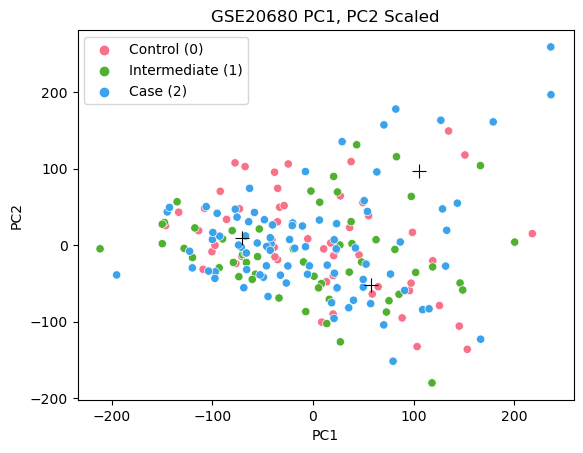

In [65]:
sns.scatterplot(x = gse20680_pca_clusters['PC1'],
                y = gse20680_pca_clusters['PC2'],
                hue=gse20680_pca_clusters['cad_status'],
                palette='husl')
sns.scatterplot(x=gse20680_kmeans.cluster_centers_[:, 0],
                y=gse20680_kmeans.cluster_centers_[:, 1],
                s=100,
                marker = "+",
                color = "black")
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title("GSE20680 PC1, PC2 Scaled")
plt.show()

## Assess Clustering

In [66]:
gse20680_pca_clusters['cad_status'].replace({'Control (0)': 0, 'Intermediate (1)': 1, 'Case (2)':2}, inplace=True)


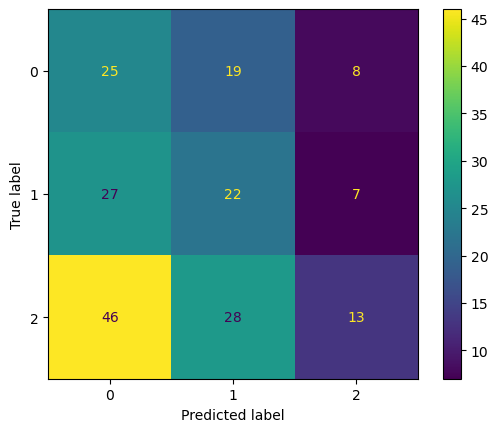

Jaccard Score: 0.17153538637262222


In [71]:
ConfusionMatrixDisplay.from_predictions(gse20680_pca_clusters['cad_status'],
                 gse20680_pca_clusters['predicted_label'])
plt.show()

jaccard = jaccard_score(gse20680_pca_clusters['cad_status'], gse20680_pca_clusters['predicted_label'], average='weighted')
print(f"Jaccard Score: {jaccard}")

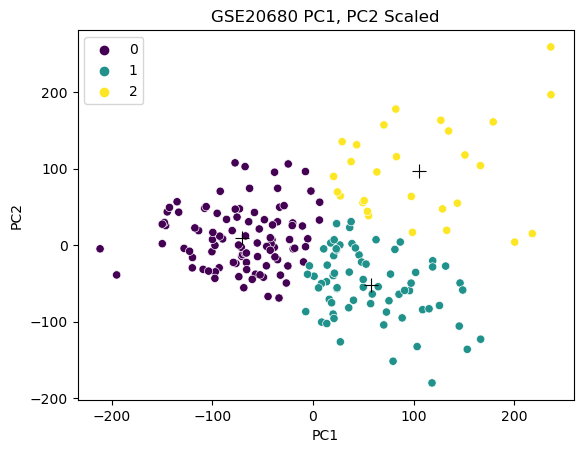

In [73]:
sns.scatterplot(x = gse20680_pca_clusters['PC1'],
                y = gse20680_pca_clusters['PC2'],
                hue=gse20680_pca_clusters['predicted_label'],
                palette='viridis')
sns.scatterplot(x=gse20680_kmeans.cluster_centers_[:, 0],
                y=gse20680_kmeans.cluster_centers_[:, 1],
                s=100,
                marker = "+",
                color = "black")
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title("GSE20680 PC1, PC2 Scaled")
plt.show()

I think this means that the labels are generally assigned correctly and that these just don't cluster very well; there's not much difference on the gene expression level, at least when reduced to two dimensions. Also perhaps worth noting that the first two PCs only capture 25% of the variance